In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import re

In [2]:
df = pd.read_csv("C:/Users/dadadah_ye/Downloads/total_data_11_27.csv", encoding = 'utf-8-sig')
df = df.dropna()
df['score'].value_counts()

1    82598
0    10218
Name: score, dtype: int64

In [3]:
# Solve data imbalanced
def under_sampling(df, target_label):
    rus  = RandomUnderSampler(return_indices=True)
    X_tl, y_tl, id_tl = rus.fit_sample(df, df[target_label])

    # remake data frame.
    columns = df.columns
    df = pd.DataFrame(X_tl, columns=columns)
    # df = df.astype(float)

    return df

df = under_sampling(df, "score")
df['score'].value_counts()

1    10218
0    10218
Name: score, dtype: int64

In [4]:
# remove emoji
def emoji(df):
    EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return EMOJI.sub(r'', df)

df['review'] = df['review'].apply(emoji)

# replace \n
def replaceText(df):
    text = df.replace("\n",".")
    return text

df['review'] = df['review'].apply(replaceText)

# regular expression
def cleanText(df):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', df)
    return text

df['review'] = df['review'].apply(cleanText)


In [5]:
from konlpy.tag import Twitter
from sklearn.model_selection import train_test_split

twitter = Twitter()
train, test = train_test_split(df, test_size=0.2)

train_x = []
train_y = []
test_x = []
test_y = []

for i, row in train.iterrows():
    train_x.append(['/'.join(token) for token in twitter.pos(row[0])])
    train_y.append(row[1])
    
for i, row in test.iterrows():
    test_x.append(['/'.join(token) for token in twitter.pos(row[0])])
    test_y.append(row[1])

C:\Users\dadadah_ye\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\dadadah_ye\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
train_x[0:10]

[['거리/Noun',
  '건너편/Noun',
  '에는/Josa',
  '스타/Noun',
  '벅스/Noun',
  '가/Josa',
  '있습니다/Adjective',
  '나/Noun',
  '는/Josa',
  '커피/Noun',
  '스미스/Noun',
  '를/Josa',
  '가로/Noun',
  '질러서/Verb',
  '그것/Noun',
  '을/Josa',
  '시험/Noun',
  '해/Verb',
  '볼/Noun',
  '것/Noun',
  '이라고/Josa',
  '알/Noun',
  '때/Noun',
  '까지/Josa',
  '거기/Noun',
  '에/Josa',
  '도착/Noun',
  '하려고/Verb',
  '했다/Verb',
  '나/Noun',
  '는/Josa',
  '뜨거운/Adjective',
  '물방울/Noun',
  '커피/Noun',
  '를/Josa',
  '주문/Noun',
  '하고/Josa',
  '막대기/Noun',
  '지역/Noun',
  '에/Josa',
  '크림/Noun',
  '과/Josa',
  '설탕/Noun',
  '을/Josa',
  '첨가/Noun',
  '하기/Verb',
  '위/Noun',
  '하여/Verb',
  '갔다/Verb',
  '그/Noun',
  '들/Suffix',
  '은/Josa',
  '우유/Noun',
  '를/Josa',
  '내/Noun',
  '드립/Noun',
  '커피/Noun',
  '에/Josa',
  '첨가/Noun',
  '해야/Verb',
  '한다고/Verb',
  '알려주었습니다/Verb',
  '나는이/Verb',
  '견과류/Noun',
  '를/Josa',
  '느낀다/Verb',
  '다음/Noun',
  '에/Josa',
  '나/Noun',
  '는/Josa',
  '스타/Noun',
  '벅스/Noun',
  '에/Josa',
  '갈거야/Verb'],
 ['상도/Noun',
  '와/Josa',
  '장승/Nou

In [7]:
tokens = [d for token in train_x for d in token]
tokens[0:10]

['거리/Noun',
 '건너편/Noun',
 '에는/Josa',
 '스타/Noun',
 '벅스/Noun',
 '가/Josa',
 '있습니다/Adjective',
 '나/Noun',
 '는/Josa',
 '커피/Noun']

In [20]:
import nltk

text = nltk.Text(tokens, name='NMSC')
print(len(text))

908537


### visualization most 50 words.

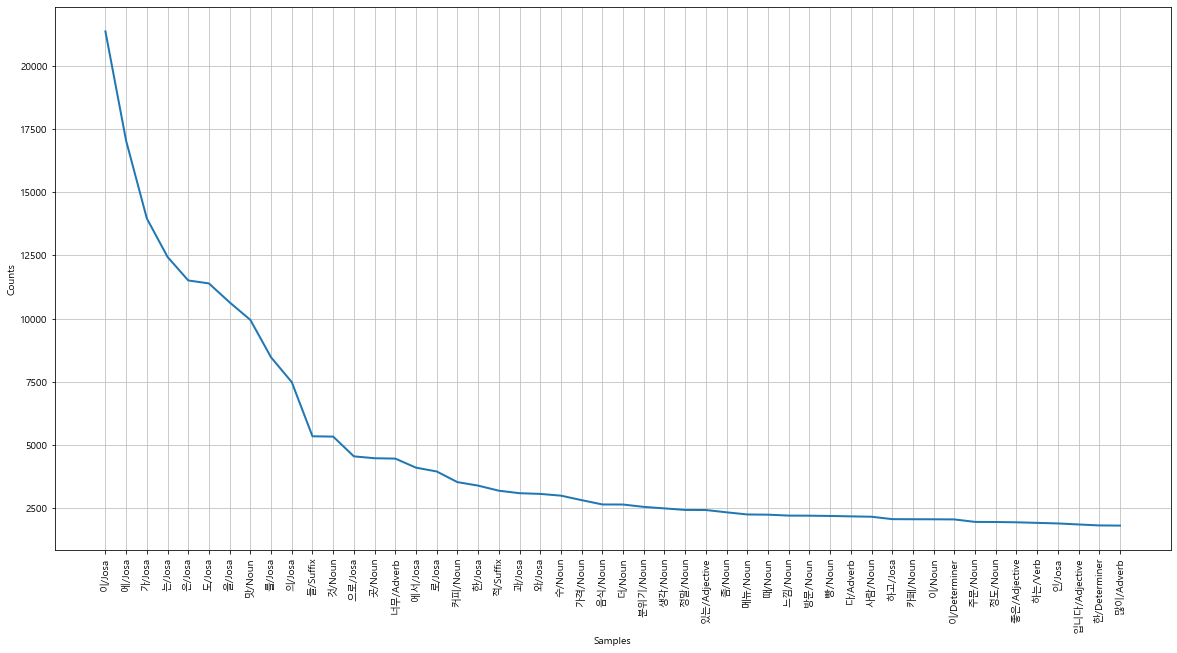

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [10]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]
selected_words[0:10]

['이/Josa',
 '에/Josa',
 '가/Josa',
 '는/Josa',
 '은/Josa',
 '도/Josa',
 '을/Josa',
 '맛/Noun',
 '를/Josa',
 '의/Josa']

In [11]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d in train_x]
test_x = [term_frequency(d) for d in test_x]
train_y = [c for c in train_y]
test_y = [c for c in test_y]

In [12]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

### modeling

In [13]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

naivebayes = MultinomialNB()
naivebayes.fit(x_train, y_train)

'''for i in np.arange(0, 1.01, 0.05):
    threshold = i
    predicated_proba = naivebayes.predict_proba(x_test)
    predicted = (predicated_proba[:,1] >= i).astype('int')
    
    accuracy = accuracy_score(y_test, predicted)
    print('threshold = {}, accuracy = {}'.format(i, accuracy))'''

print('Navie Bayes accuracy = {}'.format(naivebayes.score(x_test,y_test)))

Navie Bayes accuracy = 0.7340998043052838


### ROC curve

In [14]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = naivebayes.predict(x_test).ravel()
#y_pred = (predicated_proba[:,1] >= 0.7).astype('int')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)
auc_curve

0.733856544318147

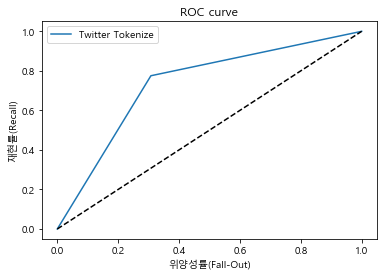

In [15]:
plt.plot(fpr, tpr, label='Twitter Tokenize')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC curve')
plt.show()

### Confusion Matrix

In [16]:
print(confusion_matrix(y_test, y_pred))
print('Recall = {}'.format(recall_score(y_test, y_pred)))

[[1407  625]
 [ 462 1594]]
Recall = 0.7752918287937743


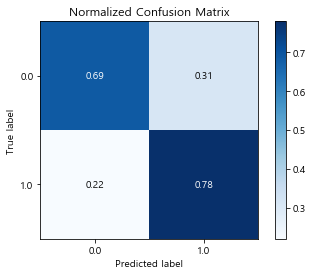

In [17]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### F1-Score

In [18]:
print('F1 - Score = {}'.format(f1_score(y_test, y_pred)))9

F1 - Score = 0.7457309941520469
